*BY: ISMAIL ABU SAIID*

# Evaluation of Feature Selection & K-Fold Cross Validation on Car Pricing Prediction

**Importing Libraries**

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

**Loading the Data**

In [74]:
# Loading the dataset into a pandas dataframe
data = pd.read_csv('car_details.csv')

**Data Preprocessing**

In [75]:
# Dropping the ID and name columns
data = data.drop(['ID', 'name'], axis=1)

In [76]:
# Printing the first 5 columns
print(data.head())

   symboling fueltypes aspiration doornumbers      carbody drivewheels  \
0          3       gas        std         two  convertible         rwd   
1          3       gas        std         two  convertible         rwd   
2          1       gas        std         two    hatchback         rwd   
3          2       gas        std        four        sedan         fwd   
4          2       gas        std        four        sedan         4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...         130        mpfi   
1          front       88.6      168.8      64.1  ...         130        mpfi   
2          front       94.5      171.2      65.5  ...         152        mpfi   
3          front       99.8      176.6      66.2  ...         109        mpfi   
4          front       99.4      176.6      66.4  ...         136        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  h

In [77]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltypes         205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumbers       205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheels       205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [78]:
# Encoding the categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data)

In [79]:
print(encoded_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

**Model Creation & Training**

Without Feature Selection

In [80]:
import numpy as np
from sklearn.model_selection import KFold

# Split the data into features and target
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate the model using cross-validation
mse_scores = []
mae_scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train, epochs=100) #, callbacks=EarlyStopping(patience=3))

    mse, mae = model.evaluate(X_test, y_test)
    mse_scores.append(mse)
    mae_scores.append(mae)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 231405888.0000 - mae: 13117.6094
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 222184880.0000 - mae: 12769.6631
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 213553072.0000 - mae: 12434.7822
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 204108432.0000 - mae: 12068.5352
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 193321264.0000 - mae: 11640.7451
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 180416256.0000 - mae: 11102.4707
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 164655296.0000 - mae: 10384.1377
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 146082672.0000 - mae: 9465.7305
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 124039264.0000 - mae: 8322.3105
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - 

In [81]:
# Print the mean and standard deviation of the cross-validation scores
print(f'Mean squared error: {sum(mse_scores)/len(mse_scores):.2f}')
print(f'Mean absolute error: {sum(mae_scores)/len(mae_scores):.2f}')

Mean squared error: 18089288.80
Mean absolute error: 2747.88


**Feature Selection**

<ipython-input-82-80af7f169c6f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

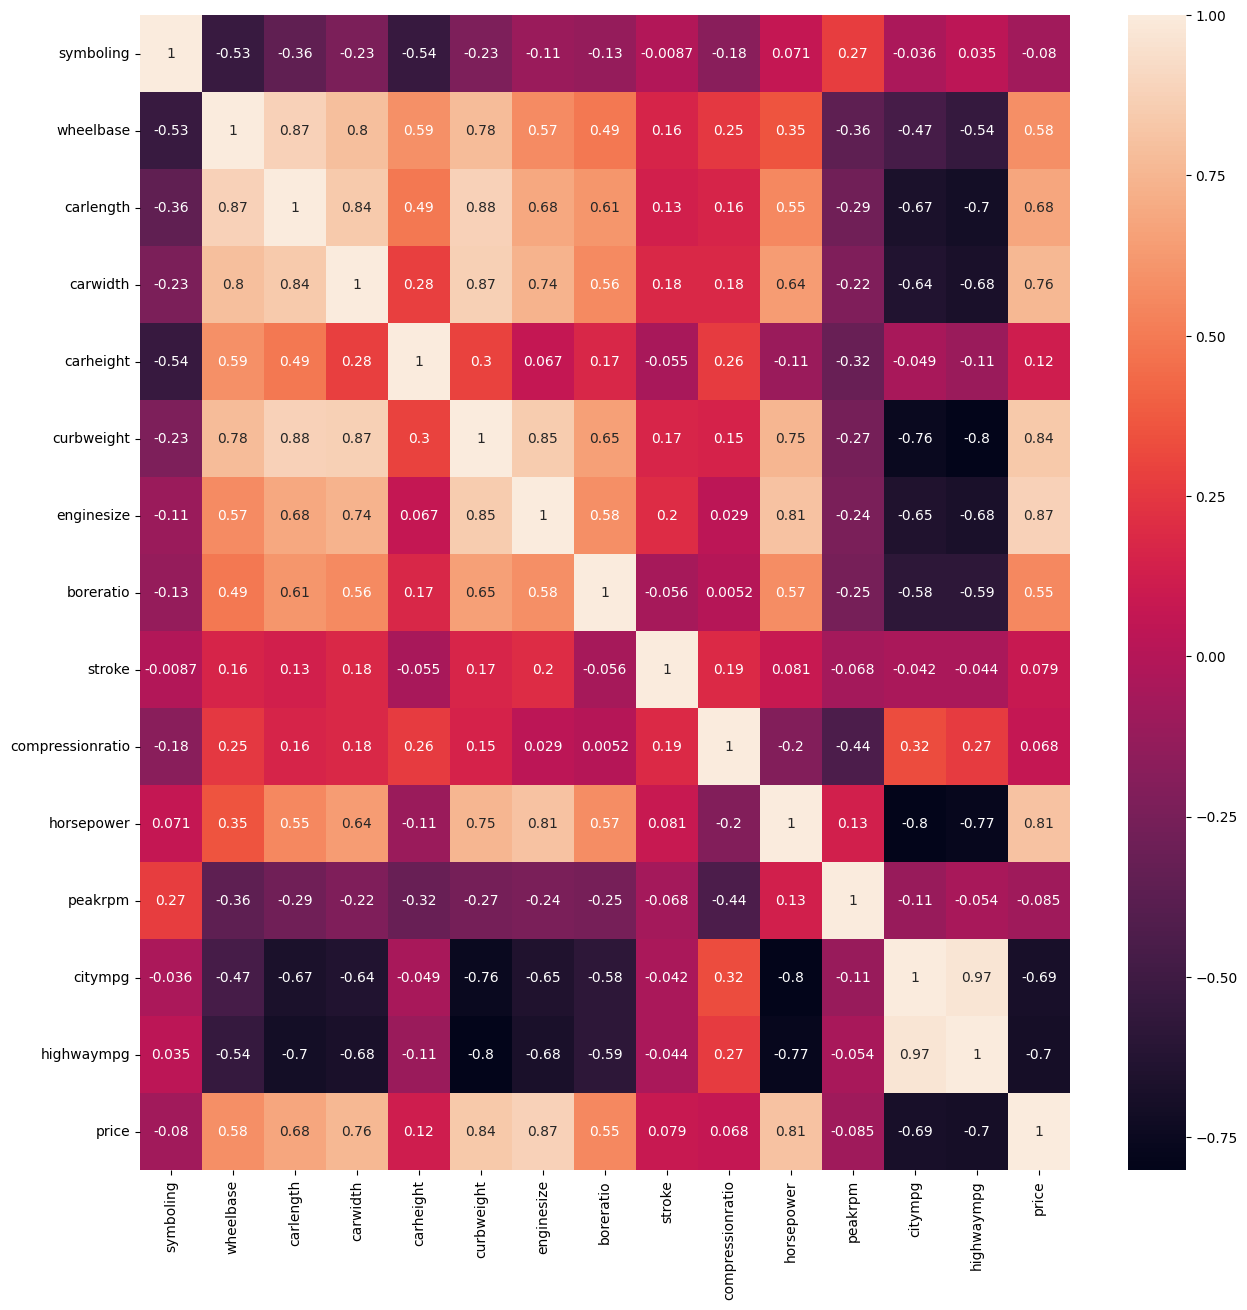

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

#Finding correlated columns for Feature selection
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)

<Axes: >

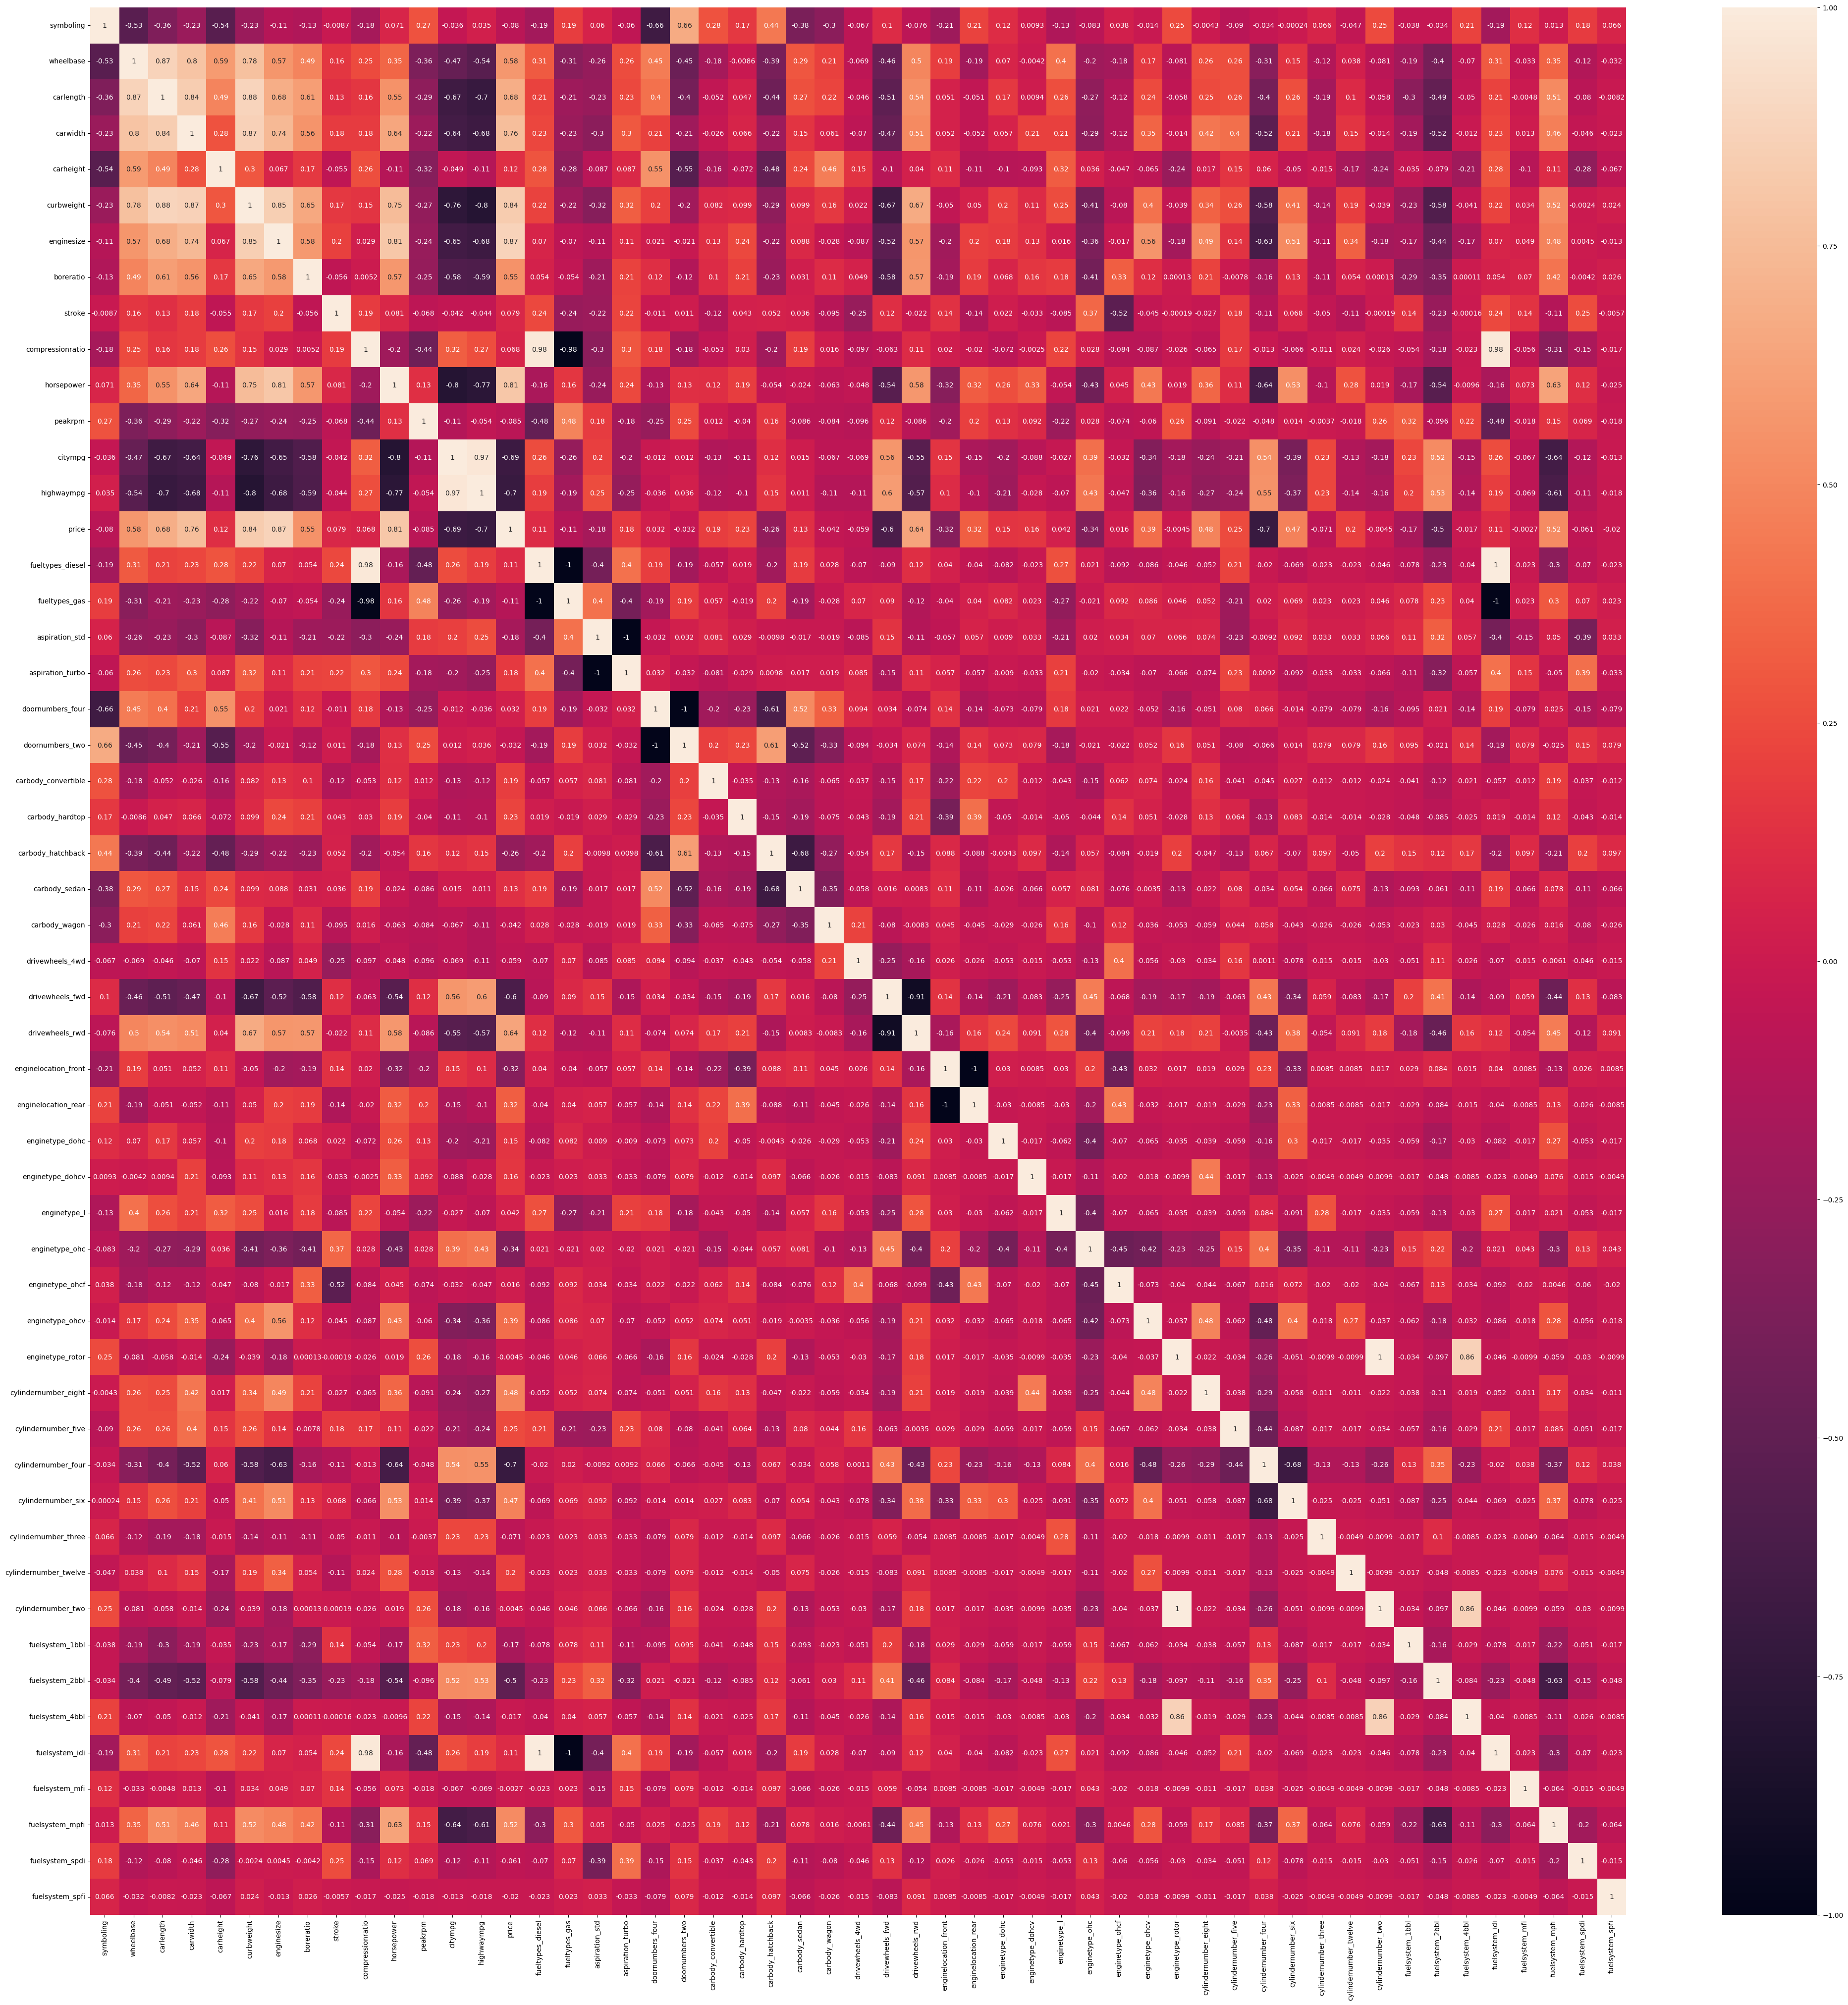

In [83]:
corr2 = encoded_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr2,annot=True)

In [84]:
#Dropping fully correlated columns
selected_data = encoded_data.drop(["fuelsystem_idi", "compressionratio", "highwaympg", "cylindernumber_two", "enginetype_rotor"], axis = 1)

In [85]:
# Split the selected features
X_train, X_test, y_train, y_test = train_test_split(selected_data.drop('price', axis=1), selected_data['price'], test_size=0.2, random_state=42)

# Scale the data: Scale the numerical features to a similar range.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include='number'))
X_test_scaled = scaler.transform(X_test.select_dtypes(include='number'))

# Select features: Use SelectKBest from the scikit-learn library to select the top 30 features based on the f_regression method.

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=30)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_columns = X_train.columns[selector.get_support()]
print(f'Selected columns: {selected_columns}')

Selected columns: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'drivewheels_fwd', 'drivewheels_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_mpfi'],
      dtype='object')


In [86]:
selected_data = selected_data.loc[:, ['price','wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'drivewheels_fwd', 'drivewheels_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_mpfi']]

print(selected_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  205 non-null    float64
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   horsepower             205 non-null    int64  
 8   citympg                205 non-null    int64  
 9   aspiration_std         205 non-null    uint8  
 10  aspiration_turbo       205 non-null    uint8  
 11  carbody_convertible    205 non-null    uint8  
 12  carbody_hardtop        205 non-null    uint8  
 13  carbody_hatchback      205 non-null    uint8  
 14  drivewheels_fwd        205 non-null    uint8  
 15  drivew

**Model Creation & Training**

With Feature Selection

In [87]:
#Training and Testing the model with the new selected features

# Split the data into features and target
X = selected_data.iloc[:, 1:]
y = selected_data['price']

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate the model using cross-validation
mse_scores_FeatureSelection = []
mae_scores_FeatureSelection = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train, epochs=100)

    mse, mae = model.evaluate(X_test, y_test)
    mse_scores_FeatureSelection.append(mse)
    mae_scores_FeatureSelection.append(mae)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 238486480.0000 - mae: 13356.5322
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 232273040.0000 - mae: 13146.0898
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 227622816.0000 - mae: 12981.1680
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 223570064.0000 - mae: 12839.5078
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 218517552.0000 - mae: 12662.3535
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 211895296.0000 - mae: 12420.1270
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 203400960.0000 - mae: 12105.5049
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 194132800.0000 - mae: 11754.4268
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 183319856.0000 - mae: 11342.6455
Epoch 10/100
6/6 [==============================] - 0s 4ms/step 

In [88]:
# Print the mean and standard deviation of the cross-validation scores to be compared with the first MSE and MAE containing all Features
print(f'Mean squared error: {sum(mse_scores_FeatureSelection)/len(mse_scores_FeatureSelection):.2f}')
print(f'Mean absolute error: {sum(mae_scores_FeatureSelection)/len(mae_scores_FeatureSelection):.2f}')

Mean squared error: 18207983.20
Mean absolute error: 3000.73


**Performance Analysis**

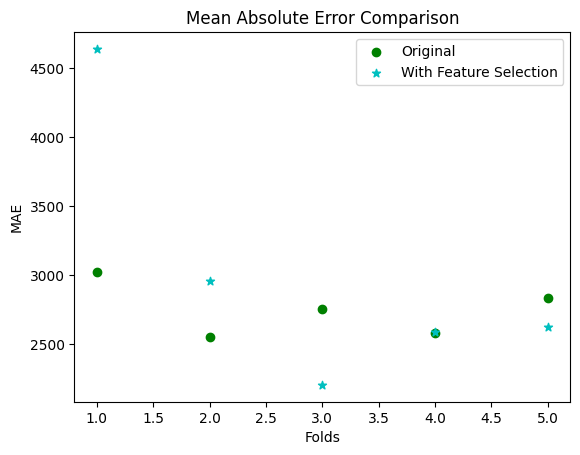

In [89]:
# Making Graphs to compare results

import matplotlib.pyplot as plt

# Create a list of folds for the x-axis
folds = [i+1 for i in range(len(mae_scores))]

# Plot the MAE values for both sets on the same graph
plt.scatter(folds, mae_scores, color="g", marker= 'o', label='Original')
plt.scatter(folds, mae_scores_FeatureSelection, color="c", marker= '*', label='With Feature Selection')

# Add labels and title
plt.xlabel('Folds')
plt.ylabel('MAE')
plt.title('Mean Absolute Error Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [90]:
print(data['price'])

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


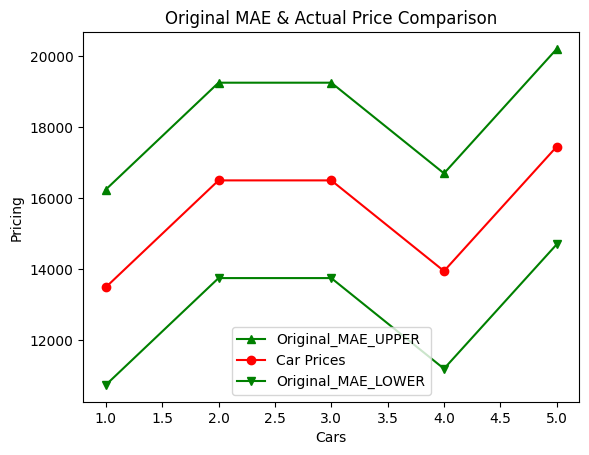

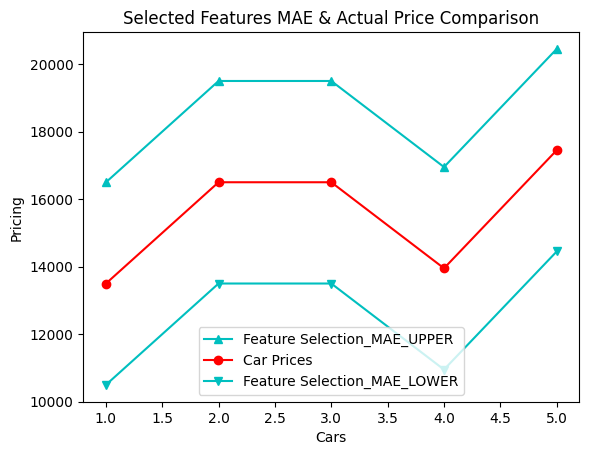

In [93]:
#Comparing Price with MAE average price of the first 5 Cars

price_list = data.loc[:4, 'price'].tolist()
pricing = [i+1 for i in range(len(price_list))]

MAE1_upper_price = [x + (sum(mae_scores)/len(mae_scores)) for x in price_list]
MAE1_lower_price = [x - (sum(mae_scores)/len(mae_scores)) for x in price_list]

MAE2_upper_price = [x + (sum(mae_scores_FeatureSelection)/len(mae_scores_FeatureSelection)) for x in price_list]
MAE2_lower_price = [x - (sum(mae_scores_FeatureSelection)/len(mae_scores_FeatureSelection)) for x in price_list]



# Plot the MAE values for both sets on the graph with the price of cars
plt.plot(pricing, MAE1_upper_price, color="g", marker="^", label='Original_MAE_UPPER' )
plt.plot(pricing, price_list, color="r", marker="o", label='Car Prices')
plt.plot(pricing, MAE1_lower_price, color="g", marker="v", label='Original_MAE_LOWER')

# Add labels and title
plt.xlabel('Cars')
plt.ylabel('Pricing')
plt.title('Original MAE & Actual Price Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()


plt.plot(pricing, MAE2_upper_price, color="c", marker="^", label='Feature Selection_MAE_UPPER')
plt.plot(pricing, price_list, color="r", marker="o", label='Car Prices')
plt.plot(pricing, MAE2_lower_price, color="c", marker="v", label='Feature Selection_MAE_LOWER')

# Add labels and title
plt.xlabel('Cars')
plt.ylabel('Pricing')
plt.title('Selected Features MAE & Actual Price Comparison')

# Add legend
plt.legend(loc='lower center')

# Show the plot
plt.show()
